 **Linear Regression**

 Y=MX+C

 Y-> Dependent Variable
 X-> Independent Variable
 w-> weight
 b-> bias

**Gradient Descent:**

Optimizing to minimize the loss function.

w = w - a * dw<br>
b = b - a * dw

**Learning Rate**<br>
Tuning parameter in an optimization algo that deternmines the step size at each iteration while moving toward gloabal minima

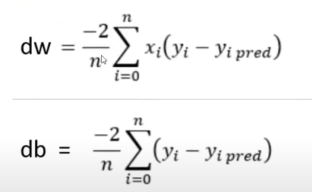

CODE STARTS FROM HERE

In [1]:
import numpy as np

LINEAR REGRESSION

In [36]:
class Linear_Regression:
    # INITIATING THE HYPERPARAMETERS
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iterations

    # FITTING THE DATA
    def fit(self, X, Y):
        # number of training examples & number of features
        self.m, self.n = X.shape  # m -> training examples

        # Initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # Implementing Gradient Descent
        for i in range(self.no_of_iteration):
            self.update_weights()

    def update_weights(self):
        # Predict the output for current weights
        Y_prediction = self.predict(self.X)  # Local variable Y_prediction

        # Calculate Gradients
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -(2 * np.sum(self.Y - Y_prediction)) / self.m

        # Update the weights
        self.w = self.w - (self.learning_rate * dw)
        self.b = self.b - (self.learning_rate * db)

    def predict(self, X):
        # Predict output using current weights and bias
        return X.dot(self.w) + self.b


USING LINEAR REGRESSION MODEL

In [9]:
#IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [11]:
#DATA PRE-PROCESSING
data = pd.read_csv("/content/salary_data.csv")

In [12]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [14]:
data.shape

(30, 2)

In [15]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [23]:
# SPLIT DATASET
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [24]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [25]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [37]:
#TRAIN TEST SPLIT
x_train ,x_test,  y_train , y_test = train_test_split(X,Y, test_size = 0.33, random_state = 2 )

In [56]:
#TRAINING

model = Linear_Regression ( learning_rate = 0.02, no_of_iterations= 5000)


In [57]:
#FITTING
model.fit(x_train, y_train)

In [58]:
#PRINTING PARAMETER VALUES

print(' Weight = ',model.w[0])
print(' Bias = ', model.b)

 Weight =  9512.944987627436
 Bias =  23707.81324657524


In [59]:
test_prediction = model.predict(x_test)

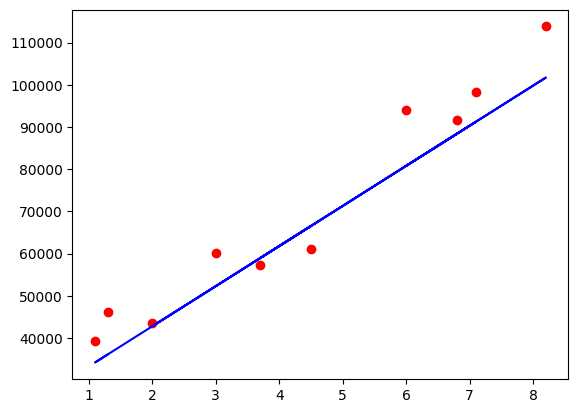

In [60]:
#VISUALIZATION

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, test_prediction, color = 'blue')
